In [4]:
!pip install librosa matplotlib IPython
!pip install librosa

import librosa
from librosa import display
import numpy as np
import IPython.display as ipd
import matplotlib as plt

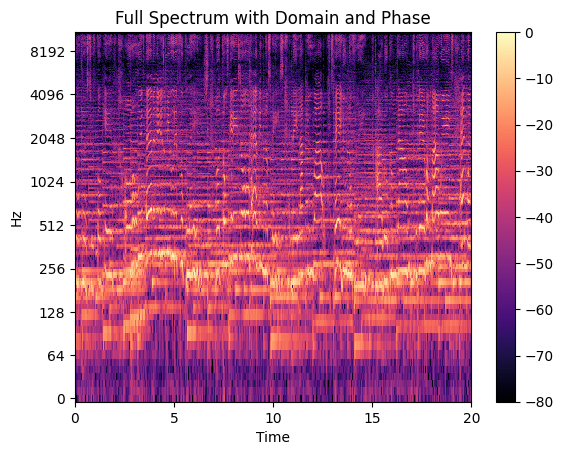

In [11]:
import librosa
from librosa import display
import numpy as np
import IPython.display as ipd
import matplotlib.pyplot as plt

# بارگذاری فایل صوتی
y, sr = librosa.load('let-it-be-me.wav')


# نمایش فایل صوتی در داخل نوت‌بوک IPython
ipd.Audio(data=y, rate=sr)

# محاسبه ماتریس مدولاسیون (amplitude) و فاز طیف صوتی
S_full, phase = librosa.magphase(librosa.stft(y))

# تبدیل زمان به تعداد فریم‌ها
idx = slice(*librosa.time_to_frames([90, 110], sr=sr))

# نمایش طیف صوتی با استفاده از matplotlib
fig, ax = plt.subplots()
img = display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax)
fig.colorbar(img, ax=ax)

# اضافه کردن دامنه و فاز به نمودار
ax.set(title='Full Spectrum with Domain and Phase')
ax.label_outer()

# نمایش نمودار
plt.show()


In [14]:
S_filter = librosa.decompose.nn_filter(S_full, aggregate=np.median, metric='cosine', width=int(librosa.time_to_frames(2, sr=sr)))
S_filter = np.minimum(S_full, S_filter)

In [13]:
margin_i, margin_v = 3, 11
power = 3

mask_i = librosa.util.softmask(S_filter, margin_i * (S_full - S_filter), power=power)
mask_v = librosa.util.softmask(S_full - S_filter, margin_v * S_filter, power=power)

S_foreground = mask_v * S_full
S_background = mask_i * S_full

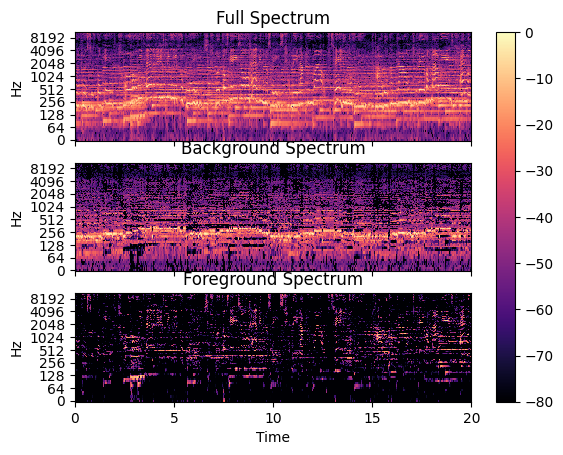

In [18]:
fig, ax = plt.subplots(nrows=3, sharex=True, sharey=True)

# این خط متغیر img را ایجاد می‌کند
img = display.specshow(librosa.amplitude_to_db(S_full[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax[0])

# این خط‌ها برای ایجاد زیرنمودارها و تنظیمات آنها هستند
ax[0].set(title='Full Spectrum')
ax[0].label_outer()

display.specshow(librosa.amplitude_to_db(S_background[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax[1])
ax[1].set(title='Background Spectrum')
ax[1].label_outer()

display.specshow(librosa.amplitude_to_db(S_foreground[:, idx], ref=np.max), y_axis='log', x_axis='time', sr=sr, ax=ax[2])
ax[2].set(title='Foreground Spectrum')
ax[2].label_outer()

fig.colorbar(img, ax=ax)


In [19]:
y_foreground = librosa.istft(S_foreground * phase)
ipd.Audio(data=y_foreground[90*sr:110*sr], rate=sr)


In [20]:
y_background = librosa.istft(S_background * phase)
ipd.Audio(data=y_background[90*sr:110*sr], rate=sr)